# Analisar acórdãos e pareceres prévios
Versão 2

## Introdução
Realiza análise exploratória de decisões<br>
Arquivo de decisões importado já possui:
* Dados da decisão (tipo, número e ano)
* Acórdãos e pareceres e prévios

___
<span style="color:red">OBS: Foram detectados 42 registros sem texto (não foi extraído do PDF)</span>

### Importação das bibliotecas

In [1]:
import pandas as pd
import numpy as np

from pathlib import Path

import matplotlib.pyplot as plt
%matplotlib inline

## Importar decisões (acórdãos e pareceres)

In [2]:
caminho_dados = Path("../../data/raw/")
df = pd.read_csv(caminho_dados/"tce_acordaos_e_pareceres.csv", sep=";")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18921 entries, 0 to 18920
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cod_tce          18921 non-null  object 
 1   assunto          17073 non-null  object 
 2   tipo_processo    18921 non-null  object 
 3   cod_ato          18921 non-null  int64  
 4   ato              18921 non-null  object 
 5   tipo_ato         18921 non-null  object 
 6   peca             18921 non-null  int64  
 7   caminho          18921 non-null  object 
 8   conselheiro      15713 non-null  object 
 9   municipio        15792 non-null  object 
 10  ug               15792 non-null  object 
 11  procurador       15639 non-null  object 
 12  ano_exercicio    15750 non-null  float64
 13  texto            18877 non-null  object 
 14  linhas           18918 non-null  object 
 15  decisao_tipo     18866 non-null  object 
 16  decisao_numero   18866 non-null  object 
 17  decisao_ano 

In [4]:
df.head()

,cod_tce,assunto,tipo_processo,cod_ato,ato,tipo_ato,peca,caminho,conselheiro,municipio,ug,procurador,ano_exercicio,texto,linhas,decisao_tipo,decisao_numero,decisao_ano,cod_processo,cod_processo_aj
0,000132/2017,DENÚNCIA REF. IRREGULARIDADES NA ADMINISTRAÇÃO...,CONTROLE SOCIAL - DENÚNCIA,1284960,ACOCAM - G.LNM - 684/2017,ACÓRDÃO DE CÂMARA,23,/2017/06/688336/133/2/805temp/ACOCAM.pdf,NaN,NaN,NaN,NaN,NaN,ACORDÃO Nº 1647/2017\n\n\nPROCESSO TC Nº 00013...,"[{'page': 1, 'x0': 245, 'x1': 380, 'bottom': 1...",acordao,1647,2017.0,TC/000132/2017,TC/000132/2017
1,000189/2014,Aposentadoria,INATIVAÇÃO - APOSENTADORIA,262333,ACOCAM - GLUCIANO - 65/2014,ACÓRDÃO DE CÂMARA,10,/2014/07/623635/12/2/587temp/ACOCAM.pdf,NaN,NaN,NaN,NaN,NaN,ACÓRDÃO N.º 788/2014\n\nProcesso TC/000189/201...,"[{'page': 1, 'x0': 70, 'x1': 316, 'bottom': 13...",acordao,788,2014.0,TC/000189/2014,TC/000189/2014
2,000135/2020,RECURSO DE RECONSIDERAÇÃO REF. AO TC/005130/2015,DOS RECURSOS - RECURSO DE RECONSIDERAÇÃO,2462530,ACOCAM - G.WA - 690/2020,ACÓRDÃO DE CÂMARA,15,/2020/03//770683/8/2/17032020_095623_46033325D...,NaN,NaN,NaN,NaN,NaN,ACÓRDÃO Nº 317/2020\nPROCESSO: TC/000135/2020\...,"[{'page': 1, 'x0': 245, 'x1': 377, 'bottom': 1...",acordao,317,2020.0,TC/000135/2020,TC/000135/2020
3,000271/2017,AUDITORIA CONCOMITANTE - EXERCICIO DE 2016,FISCALIZAÇÃO - AUDITORIA,1389052,ACOPLE - G.LNM - 281/2017,ACÓRDÃO DO PLENO,35,/2017/09/688475/133/3/604temp/ACOPLE.pdf,NaN,NaN,NaN,NaN,NaN,ACORDÃO Nº 2.504/17\n\nPROCESSO TC Nº 000271/2...,"[{'page': 1, 'x0': 250, 'x1': 376, 'bottom': 1...",acordao,2504,2017.0,TC/000271/2017,TC/000271/2017
4,000244/2017,"DENÚNCIA REF. IRREGULARIDADES NA FUESPI, EXERC...",CONTROLE SOCIAL - DENÚNCIA,1255656,ACOCAM - G.LNM - 650/2017,ACÓRDÃO DE CÂMARA,20,/2017/05/688448/133/2/117temp/ACOCAM.pdf,NaN,NaN,NaN,NaN,NaN,ACORDÃO Nº 1.269/2017\n\n\nPROCESSO TC Nº 0002...,"[{'page': 1, 'x0': 244, 'x1': 382, 'bottom': 1...",acordao,1269,2017.0,TC/000244/2017,TC/000244/2017


### Plotar coordenadas de determinado acórdão

In [7]:
linhas = eval(df.iloc[10]['linhas'])
linhas

[{'page': 1,
  'x0': 230,
  'x1': 356,
  'bottom': 129,
  'text': 'ACÓRDÃO Nº 320/2020'},
 {'page': 1,
  'x0': 85,
  'x1': 240,
  'bottom': 171,
  'text': 'PROCESSO: TC/000399/2018'},
 {'page': 1,
  'x0': 85,
  'x1': 203,
  'bottom': 184,
  'text': 'DECISÃO Nº 196/2020'},
 {'page': 1,
  'x0': 85,
  'x1': 513,
  'bottom': 198,
  'text': 'ASSUNTO: ACOMPANHAMENTO DE CUMPRIMENTO DE DECISÃO - '},
 {'page': 1,
  'x0': 85,
  'x1': 513,
  'bottom': 212,
  'text': 'ADMISSÃO DE PESSOAL - SECRETARIA DE ESTADO DA EDUCAÇÃO '},
 {'page': 1,
  'x0': 85,
  'x1': 212,
  'bottom': 226,
  'text': '(EXERCÍCIO DE 2017).'},
 {'page': 1,
  'x0': 85,
  'x1': 381,
  'bottom': 240,
  'text': 'OBJETO: PROCESSO SELETIVO - EDITAL Nº 051/2017.'},
 {'page': 1,
  'x0': 85,
  'x1': 436,
  'bottom': 253,
  'text': 'INTERESSADO: REJANE RIBEIRO SOUSA DIAS – SECRETÁRIA.'},
 {'page': 1,
  'x0': 85,
  'x1': 513,
  'bottom': 267,
  'text': 'ADVOGADO(S): WILDSON DE ALMEIDA OLIVEIRA SOUSA - OAB/PI n° 5.845 '},
 {'page': 1,
  '

In [8]:
x = [linha['x0'] for linha in linhas if linha['page']==1]
y = [linha['bottom'] for linha in linhas if linha['page']==1]

In [9]:
pd.DataFrame({'x': x, 'y': y})

,x,y
0,230,129
1,85,171
2,85,184
3,85,198
4,85,212
5,85,226
6,85,240
7,85,253
8,85,267
9,85,281


C:\Users\antonio.moreira\AppData\Local\Continuum\anaconda3\envs\ocr\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\antonio.moreira\AppData\Local\Continuum\anaconda3\envs\ocr\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\antonio.moreira\AppData\Local\Continuum\anaconda3\envs\ocr\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().ro

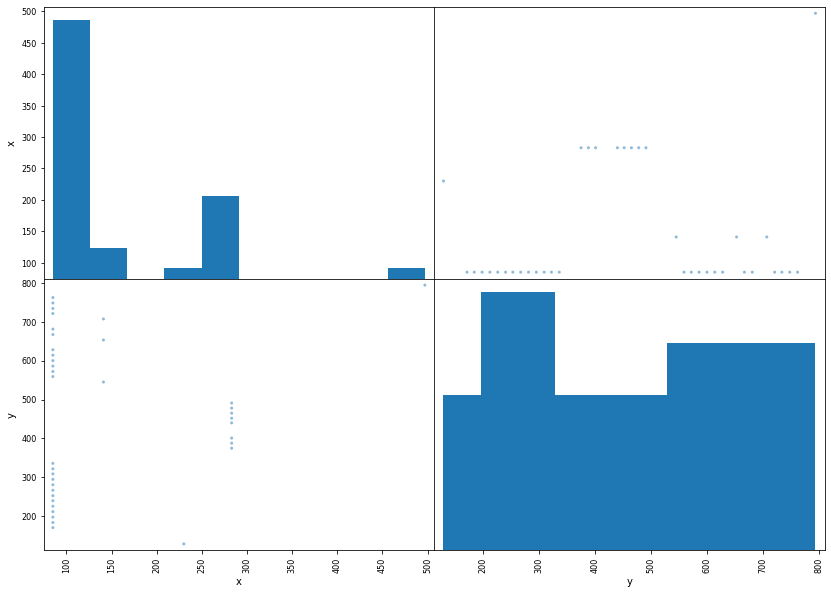

In [10]:
from pandas.plotting import scatter_matrix
scatter_matrix(pd.DataFrame({'x': x, 'y': y}),figsize=(14,10), alpha=0.5, );

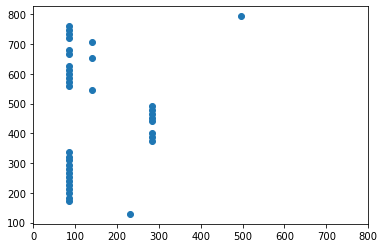

In [11]:
# Analisar ax.broken_barh (https://matplotlib.org/gallery/lines_bars_and_markers/broken_barh.html#sphx-glr-gallery-lines-bars-and-markers-broken-barh-py)
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set_xlim(0, 800)

plt.show()

In [12]:
df.iloc[3135]

cod_tce                                                 005364/2015
assunto                           PROTOCOLO GERADO AUTOMATICAMENTE.
tipo_processo                             CONTAS - CONTAS DE GESTÃO
cod_ato                                                     2248758
ato                               ACOCAM - AUD-DELANO  -  1169/2019
tipo_ato                                          ACÓRDÃO DE CÂMARA
peca                                                             64
caminho                    /2019/09/649634/120/2/230temp/ACOCAM.pdf
conselheiro                         DELANO CARNEIRO DA CUNHA CAMARA
municipio                                          Valença do Piauí
ug                                        P. M. DE VALENCA DO PIAUI
procurador                                PLÍNIO VALENTE RAMOS NETO
ano_exercicio                                                  2015
texto             ACÓRDÃO Nº 1.430/2019\n\n\nPROCESSO: TC/005364...
linhas            [{'page': 1, 'x0': 240, 'x1': 

In [13]:
df[['texto', 'linhas']]

,texto,linhas
0,ACORDÃO Nº 1647/2017\n\n\nPROCESSO TC Nº 00013...,"[{'page': 1, 'x0': 245, 'x1': 380, 'bottom': 1..."
1,ACÓRDÃO N.º 788/2014\n\nProcesso TC/000189/201...,"[{'page': 1, 'x0': 70, 'x1': 316, 'bottom': 13..."
2,ACÓRDÃO Nº 317/2020\nPROCESSO: TC/000135/2020\...,"[{'page': 1, 'x0': 245, 'x1': 377, 'bottom': 1..."
3,ACORDÃO Nº 2.504/17\n\nPROCESSO TC Nº 000271/2...,"[{'page': 1, 'x0': 250, 'x1': 376, 'bottom': 1..."
4,ACORDÃO Nº 1.269/2017\n\n\nPROCESSO TC Nº 0002...,"[{'page': 1, 'x0': 244, 'x1': 382, 'bottom': 1..."
...,...,...
18592,ACÓRDÃO Nº 497/2.014\n\n\nPROCESSO TC-O 04438...,"[{'page': 1, 'x0': 219, 'x1': 323, 'bottom': 1..."
18593,ACÓRDÃO Nº 497/2.014\n\n\nPROCESSO TC-O 04438...,"[{'page': 1, 'x0': 219, 'x1': 323, 'bottom': 1..."
18594,ACORDÃO Nº 1.579/2014\n\nPROCESSO TC-O 046850/...,"[{'page': 1, 'x0': 78, 'x1': 386, 'bottom': 15..."
18595,ACÓRDÃO Nº. 590/14\n\n\nDECISÃO Nº 114/14\nSE...,"[{'page': 1, 'x0': 235, 'x1': 385, 'bottom': 1..."


## Acódãos e pareceres cujo texto não foi recuperado
Percebi ALGUNS acórdãos com identificação diferente da determinada e, por isso, o texto não foi estraído. Por exemplo:
* DECISÃO MONOCRÁTICA

In [15]:
# Filtrar somente os que não possuem texto
#df_sem_texto = df[(df['texto'].isna()) & (df['ano_exercicio'] > 2013)]
df_sem_texto = df[df['texto'].isna()]
print(df_sem_texto.shape)
df_sem_texto

(42, 18)


,cod_tce,assunto,tipo_processo,cod_ato,ato,tipo_ato,peca,caminho,conselheiro,municipio,ug,procurador,ano_exercicio,texto,linhas,decisao_tipo,decisao_numero,decisao_ano
6,004625/2013,NaN,CONTAS - CONTAS DE GESTÃO,7729,ACOCAM - GREBELO - 1/2013,ACÓRDÃO DE CÂMARA,1,/2013/04/607197/13/2/537temp/ACOCAM.pdf,ANFRISIO NETO LOBAO CASTELO BRANCO,Teresina,LACEN - LABORATORIO CENTRAL DR. COSTA ALVARENG...,JOSÉ ARAÚJO PINHEIRO JÚNIOR,2013.0,NaN,[],NaN,NaN,NaN
132,000557/2019,RECURSO DE RECONSIDERAÇÃO REF. AO TC/003053/20...,DOS RECURSOS - RECURSO DE RECONSIDERAÇÃO,2002893,ACO - AUD-JACKSO - 1236/2019,ACÓRDÃO,12,/2019/02/749088/119/75/856temp/ACO.pdf,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN
158,000900/2017,APOSENTADORIA,INATIVAÇÃO - APOSENTADORIA,1245846,ACO - AUD-JACKSO - 698/2017,ACÓRDÃO,5,/2017/05/689104/119/75/909temp/ACO.pdf,JACKSON NOBRE VERAS,Uniao,FMPS-FUNDO MUNIC. DE PREVIDÊNCIA SOCIAL DE UNIAO,LEANDRO MACIEL DO NASCIMENTO,2017.0,NaN,[],NaN,NaN,NaN
2269,004843/2015,PRESTAÇÃO DE CONTAS - EXERCÍCIO 2014,CONTAS - CONTAS DE GESTÃO,1080994,ACO - G.WA - 347/2016,ACÓRDÃO,3,/2016/12/649113/8/75/60temp/ACO.pdf,WALTANIA MARIA NOGUEIRA DE SOUSA LEAL ALVARENGA,Parnaíba,EMPA - EMPRESA PARNAIBANA DE SUPERVISÃO DO ABA...,RAÏSSA MARIA REZENDE DE DEUS BARBOSA,2014.0,NaN,[],NaN,NaN,NaN
2365,003869/2014,Recurso de reconsideração,DOS RECURSOS - RECURSO DE RECONSIDERAÇÃO,228644,ACOPLE - AUD-JAYLSO - 29/2014,ACÓRDÃO DO PLENO,12,/2014/05/627328/16/3/926temp/ACOPLE.pdf,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN
2702,004939/2014,PENSÃO,INATIVAÇÃO - PENSÃO POR MORTE,1145363,ACO - AUD-JACKSO - 502/2017,ACÓRDÃO,9,/2017/02/628398/119/75/794temp/ACO.pdf,JACKSON NOBRE VERAS,Teresina,IAPEP - INSTITUTO DE ASSISTENCIA E PREVIDENCIA...,JOSE ARAUJO PINHEIRO JUNIOR,2014.0,NaN,[],NaN,NaN,NaN
2815,005201/2015,PROTOCOLO GERADO AUTOMATICAMENTE.,CONTAS - CONTAS DE GESTÃO,1508418,PARPRE - AUD-JAYLSO - 120/2017,PARECER PRÉVIO,64,/2017/11/649471/16/42/958temp/PARPRE.pdf,JAYLSON FABIANH LOPES CAMPELO,Manoel Emídio,P. M. DE MANOEL EMIDIO,RAÏSSA MARIA REZENDE DE DEUS BARBOSA,2015.0,NaN,[],NaN,NaN,NaN
3128,000499/2013,DENÚNCIA REF. À IRREGULARIDADES NA ADMINISTRAÇ...,CONTROLE SOCIAL - DENÚNCIA,316579,ACOCAM - GABELARDO - 133/2014,ACÓRDÃO DE CÂMARA,26,/2014/09/52713/9/2/739temp/ACOCAM.pdf,ABELARDO PIO VILANOVA E SILVA,Colônia do Gurguéia,P. M. DE COLONIA DO GURGUEIA,LEANDRO MACIEL DO NASCIMENTO,2013.0,NaN,[],NaN,NaN,NaN
4380,005403/2015,PROTOCOLO GERADO AUTOMATICAMENTE.,CONTAS - CONTAS DE GESTÃO,1476842,PARPRE - AUD-JAYLSO - 119/2017,PARECER PRÉVIO,52,/2017/11/649673/16/42/448temp/PARPRE.pdf,JAYLSON FABIANH LOPES CAMPELO,Conceição do Canindé,P. M. DE CONCEICAO DO CANINDE,RAÏSSA MARIA REZENDE DE DEUS BARBOSA,2015.0,NaN,[],NaN,NaN,NaN
4388,005988/2017,PROTOCOLO GERADO AUTOMATICAMENTE.,CONTAS - CONTAS DE GESTÃO,2587000,ACOCAM - GREBELO - 791/2020,ACÓRDÃO DE CÂMARA,47,/2020/08//694192/13/2/19082020_152519_4F33AF3A...,OLAVO REBELO DE CARVALHO FILHO,Bonfim do Piauí,P. M. DE BONFIM DO PIAUI,RAÏSSA MARIA REZENDE DE DEUS BARBOSA,2017.0,NaN,NaN,NaN,NaN,NaN


## Acórdãos e pareceres com texto mas sem número do acórdão
Acórdãos e pareceres que  possuem texto mas que número do acórdão não foi extraído

In [18]:
# pareceres que possuem texto mas que número não foi extraído
df[df['decisao_numero'].isna() & df['texto'].notna()]['texto']

5054     ACÓRDÃO Nº. 002-2020\nDECISÃO Nº. 006/2020.\nP...
5510     ACÓRDÃO Nº 1.535-A\n\n\nPROCESSO TC/010164/201...
6079     ACÓRDÃO Nº 1.1902013\n\nProcesso TC nº 10.361/...
6135     ACÓRDÃO Nº 016-A\n\nPROCESSO TC/013531/2015\nD...
6153     acórdão, razão pela qual requereu, preliminarm...
10498    ACÓRDÃO Nº. 2.092-A\n\n\nPROCESSO TC/021363/20...
10633    ACÓRDÃO\nDECISÃO PLENÁRIA N.º 592/13\n\n\n\nMe...
10767    ACÓRDÃO Nº 2.738 (Fls. 01)\n\nProcesso TC02866...
10771    ACÓRDÃO Nº 2.735 (fl.01)\n\n\nProcesso TC/0187...
13878    parecer prévio recomendando a aprovação com re...
15957    ACÓRDÃO N° 12012013\nPrestação de Contas Anual...
Name: texto, dtype: object

In [19]:
# quantidade de deciões por ano
df['decisao_ano'].value_counts()

2016.0     3864
2017.0     3456
2015.0     3307
2019.0     2560
2018.0     2356
2014.0     1567
2020.0     1136
2013.0      274
2011.0       10
2012.0        6
2010.0        5
166.0         1
20015.0       1
2009.0        1
Name: decisao_ano, dtype: int64

## Verificar inconsistência entre o tipos de ato do e-tce e de decisão
inconsistências entre o tipo de ato do e-tce e tipo de decisão contante no ato (PDF)

In [21]:
df.groupby(['tipo_ato', 'decisao_tipo']).count()['cod_tce']

tipo_ato           decisao_tipo
ACÓRDÃO            acordao          2677
                   parecer            20
ACÓRDÃO DE CÂMARA  acordao         10847
                   parecer           198
ACÓRDÃO DO PLENO   acordao          3525
                   parecer             5
PARECER PRÉVIO     acordao            61
                   parecer          1211
Name: cod_tce, dtype: int64